<a href="https://colab.research.google.com/github/ghazalv/usersegmentation/blob/main/segmention2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset into a Pandas DataFrame

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_for_analyst_assignment_20201120.csv")

print(df.isnull().sum())


REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [35]:
#replace missing values with the mean or median value of the column.
df = df.fillna(df.median())


<ipython-input-35-c39fe09ed6d2>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


Shape of the dataset: (21983, 30)
Summary statistics:
        PURCHASE_COUNT  PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY  \
count    21983.000000             21983.000000             21983.000000   
mean         3.345358                 4.047264                 0.203794   
std          8.523171                 8.012926                 1.063899   
min          0.000000                 0.000000                 0.000000   
25%          0.000000                 2.000000                 0.000000   
50%          1.000000                 2.000000                 0.000000   
75%          3.000000                 3.000000                 0.000000   
max        320.000000               320.000000                44.000000   

           USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  EVENING_PURCHASES  \
count  21983.00000         21983.000000     21983.000000       21983.000000   
mean   10992.00000             0.106127         1.752354           0.269981   
std     6346.08982             0

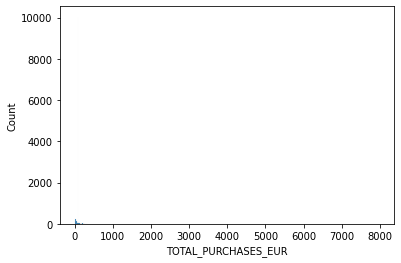

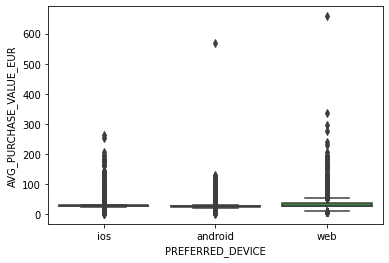

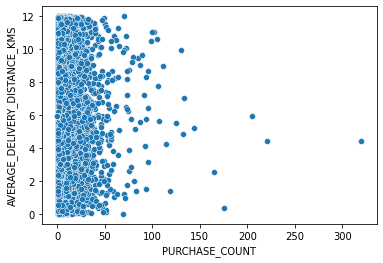

In [36]:
# Get the number of rows and columns in the dataset
print('Shape of the dataset:', df.shape)

# Get the basic statistical measures of the numeric columns
print('Summary statistics:\n', df.describe())

# Get the data types of the columns
print('Data types:\n', df.dtypes)

# Check for missing values
print('Missing values:\n', df.isnull().sum())

# Plot a histogram of the total purchases
sns.histplot(df['TOTAL_PURCHASES_EUR'])
plt.show()

# Plot a boxplot of the average purchase value by preferred device
sns.boxplot(x='PREFERRED_DEVICE', y='AVG_PURCHASE_VALUE_EUR', data=df)
plt.show()

# Plot a scatterplot of the purchase count by the average delivery distance
sns.scatterplot(x='PURCHASE_COUNT', y='AVERAGE_DELIVERY_DISTANCE_KMS', data=df)
plt.show()


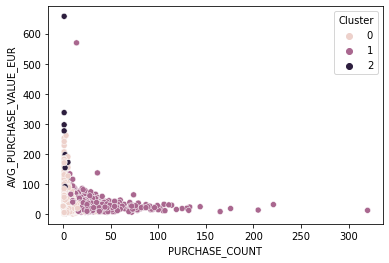

In [37]:
# Select the columns we want to use for clustering
X = df[['PURCHASE_COUNT', 'AVG_PURCHASE_VALUE_EUR', 'DISTINCT_PURCHASE_VENUE_COUNT', 'TOTAL_PURCHASES_EUR', 'AVERAGE_DELIVERY_DISTANCE_KMS', 'AVG_DAYS_BETWEEN_PURCHASES']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering algorithm to group the users
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize the clusters using a scatterplot
sns.scatterplot(x='PURCHASE_COUNT', y='AVG_PURCHASE_VALUE_EUR', hue='Cluster', data=df)
plt.show()


In [38]:
# Compute the mean values of the features for each cluster
cluster_means = df.groupby('Cluster').mean()

# Print the mean values for each cluster
print(cluster_means)


         PURCHASE_COUNT  PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY  \
Cluster                                                                     
0              1.743813                 2.625267                 0.132396   
1             27.524272                26.276326                 1.247946   
2              2.426441                 2.218688                 0.207753   

              USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  \
Cluster                                                       
0        10983.253335             0.054894         1.151594   
1        10988.781180             0.889470        11.266617   
2        11167.026839             0.063618         0.816103   

         EVENING_PURCHASES  DINNER_PURCHASES  LATE_NIGHT_PURCHASES  \
Cluster                                                              
0                 0.146604          1.397342                   0.0   
1                 2.150859         13.127707                   0.0   
2                 